In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
directory = 'C:\\Users\\User\\Downloads\\ITO data'

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (27967) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (29779) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (29795) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (29807) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (26135) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is no

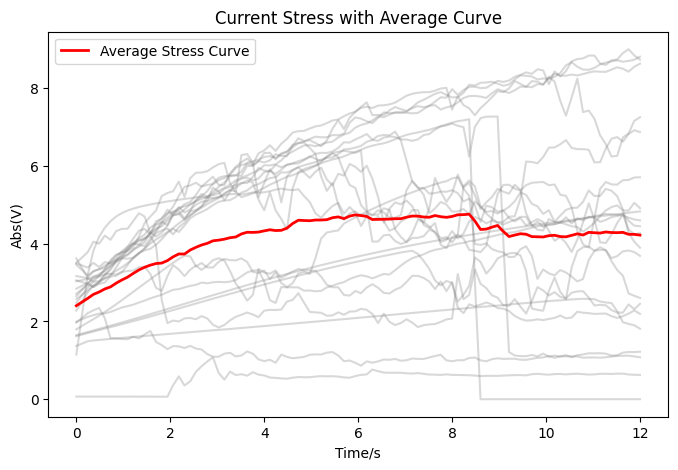

In [3]:
# Storage for interpolated data
x_col = "Time"
y_col = "BV"
x_values = np.linspace(0, 12, 100)  # Define a common x-range for interpolation
y_values_list = []

# Read and process each Excel file
for file in os.listdir(directory):
    if "stress" in file and file.endswith(".xls"):
        file_path = os.path.join(directory, file)
        df = pd.read_excel(file_path)

        if x_col in df.columns and y_col in df.columns:
            x = df[x_col].dropna().values
            y = df[y_col].dropna().values

            # Interpolate to align x-values
            interp_func = interp1d(x, y, kind='linear', fill_value="extrapolate")
            y_interp = interp_func(x_values)

            y_values_list.append(y_interp)

y_avg = np.mean(y_values_list, axis=0)

# Plot individual datasets
plt.figure(figsize=(8, 5))
for y_interp in y_values_list:
    plt.plot(x_values, abs(y_interp), color="grey", alpha=0.3)

# Plot the average curve
plt.plot(x_values, abs(y_avg), color="red", linewidth=2, label="Average Stress Curve")

plt.xlabel("Time/s")
plt.ylabel("Abs(V)")
plt.title("Current Stress with Average Curve")
plt.legend()
plt.show()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (65974) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (65990) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (65986) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (65992) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (66016) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (65946) not 512 + multiple of sector size (5

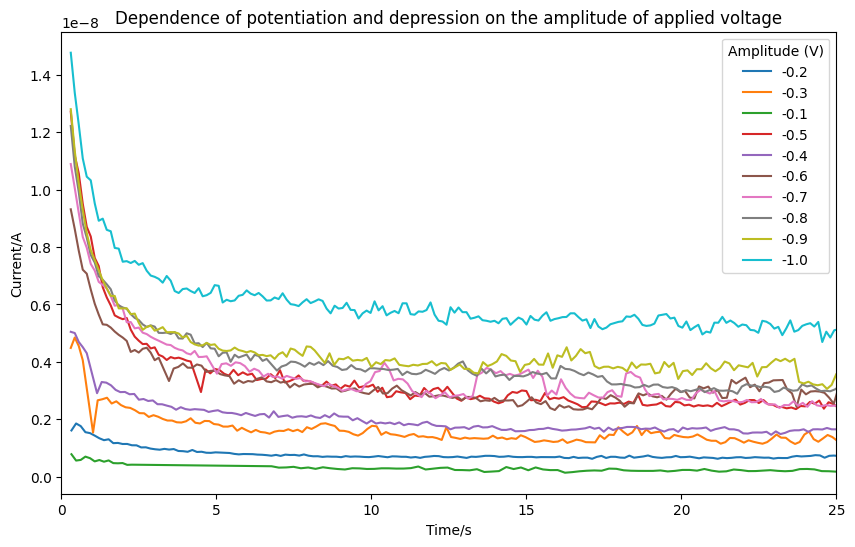

In [14]:
x_col = "Time"
y_col = "BI"
legend = "BV"

plt.figure(figsize=(10, 6))
# run_numbers = ["334", "335", "336", "337", "339", "340", "341", "342", "343", "343"]
# run_numbers = ["361", "360", "359", "358", "357", "356", "355", "354", "353"]
run_numbers = ["381", "382", "383", "384", "385", "386", "387", "388", "389", "390"]
# run_numbers = ["395", "396", "397", "398", "399"]
# run_numbers = ["400", "401", "402", "403", "404"]

for file in os.listdir(directory):
    if any(x in file for x in run_numbers) and file.endswith(".xls"):
        file_path = os.path.join(directory, file)
        df = pd.read_excel(file_path)
        if x_col in df.columns and y_col in df.columns:
            plt.plot(df[x_col], abs(df[y_col]), label=np.mean(df[legend]).round(2))

plt.xlim(0, 25)
plt.ylabel("Current/A")
plt.xlabel("Time/s")
plt.legend( title="Amplitude (V)")
plt.title("Dependence of potentiation and depression on the amplitude of applied voltage")
plt.show()